In [3]:
import pandas as pd
import numpy as np
import re
import complex
import math

# Define the provided functions here

def clean_word(word):
    #  word = word.lower()  # Lowercase the word
    # Remove leading/trailing/inter-word punctuation
    cleaned_word = re.sub(r'(?<!\w)[\'\"?!;:,.]|(?<=\s)[\'\"?!;:,.]|[\'\"?!;:,.](?!\w)', '', word)
    return cleaned_word

def clean_text(text):
    words = text.split()
    cleaned_words = [clean_word(word) for word in words if clean_word(word)]
    return cleaned_words

words1 = complex.read_file_to_dic('vocabulary/top_english_adjs_lower_100000.txt')
words2 = complex.read_file_to_dic('vocabulary/top_english_words_lower_100000.txt')
words3 = complex.read_file_to_dic('vocabulary/top_english_verbs_lower_100000.txt')
words4 = complex.read_file_to_dic('vocabulary/top_english_nouns_lower_100000.txt')

def calculate_complexity(text: str) -> float:
    words = clean_text(text)
    complexity = 0.0
    values = []
    for word in words:
        # if words1.get(word) is not None:
        #     complexity += words1[word]
        #     values.append(words1[word])
        # if words2.get(word) is not None:
        #     complexity += words2[word]
        #     values.append(words2[word])
        # if words3.get(word) is not None:
        #     complexity += words3[word]
        #     values.append(words3[word])
        if words1.get(word) is not None:
            value = words1[word] +0.01
            value = math.log2(value)
            complexity += value
            values.append(value)
        if words3.get(word) is not None:
            value = words3[word] +0.01
            value = math.log2(value)
            complexity += value
            values.append(value)
        if words4.get(word) is not None:
            value = words4[word] +0.01
            value = math.log2(value)
            complexity += value
            values.append(value)
        # if words4.get(word) is not None:
        #     if (words4[word] != 0):
        #         value = math.log2(words4[word])
        #     else:
        #         value = 0
        #     complexity += value
        #     values.append(value)
    if values:
        return np.mean(values)
    else:
        return complexity  # Return 0 or a default value if no words match



Mean: 11.64985260411214, Median: 11.645596658549543, Standard Deviation: 0.2324578726824029


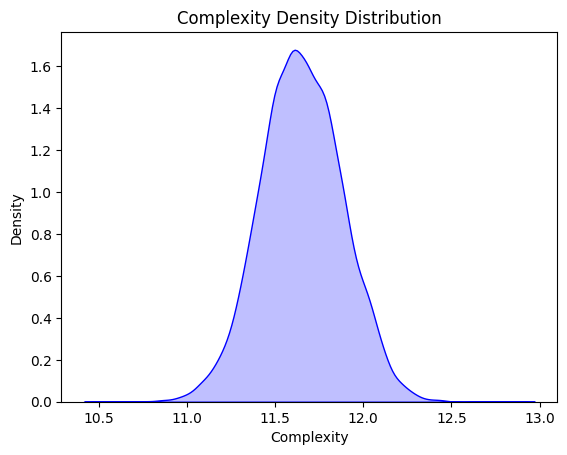

Mean: 11.57063185089794, Median: 11.579130498070251, Standard Deviation: 0.18577877018413952


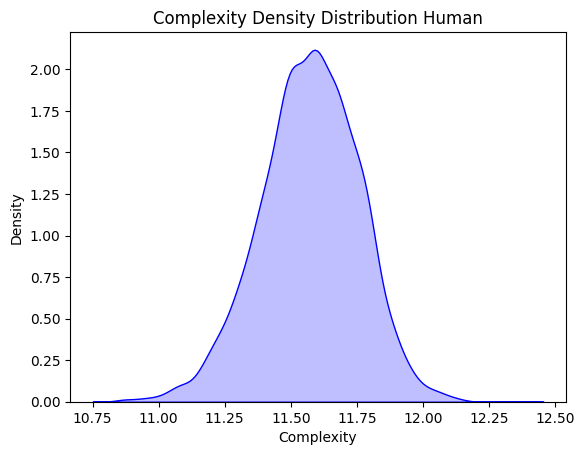

Mean: 11.719610381726074, Median: 11.736494188259943, Standard Deviation: 0.24666355535936632


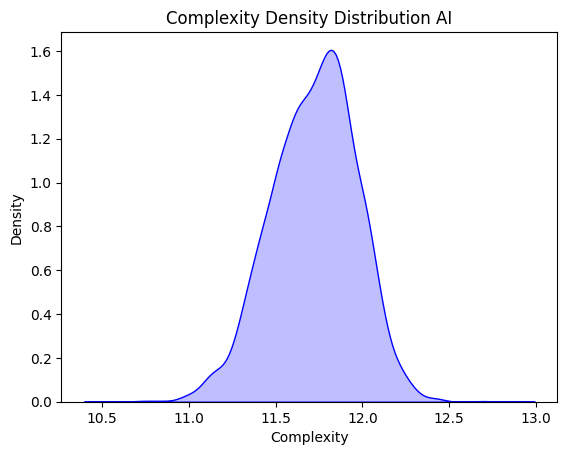

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 45672 to 20252
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        9997 non-null   object 
 1   generated   9997 non-null   int64  
 2   complexity  9997 non-null   float64
 3   variance    9997 non-null   float64
 4   length      9997 non-null   int64  
 5   prevalence  9997 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 546.7+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 5000000)

combined_df = pd.read_csv('metadataset.csv')
combined_df = pd.read_csv('human_expert_essays.csv')
combined_df = pd.read_csv('train_v2_drct_02.csv').sample(10000)
combined_df = pd.read_csv('final_test.csv')
combined_df = pd.read_csv('megaset.csv').sample(10000)
max_complexity = 14 # Example threshold; adjust according to your needs
min_complexity = 9

combined_df['complexity'] = combined_df['text'].apply(lambda x: calculate_complexity(x))
combined_df = combined_df[combined_df['complexity'] <= max_complexity]
combined_df = combined_df[combined_df['complexity'] >= min_complexity]

# filter by generated == 1
ai_generated_df = combined_df[combined_df['generated'] == 1]
# Subset where 'generated' is 0 (Human-written)
human_written_df = combined_df[combined_df['generated'] == 0]



mean = combined_df['complexity'].mean()
median = combined_df['complexity'].median()
std = combined_df['complexity'].std()

print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std}")

sns.kdeplot(combined_df['complexity'], fill=True, color='blue')
plt.xlabel('Complexity')
plt.ylabel('Density')
plt.title('Complexity Density Distribution')
plt.show()


# human
mean_human = human_written_df['complexity'].mean()
median_human = human_written_df['complexity'].median()
std_human = human_written_df['complexity'].std()

print(f"Mean: {mean_human}, Median: {median_human}, Standard Deviation: {std_human}")

sns.kdeplot(human_written_df['complexity'], fill=True, color='blue')
plt.xlabel('Complexity')
plt.ylabel('Density')
plt.title('Complexity Density Distribution Human')
plt.show()

# ai
mean_ai = ai_generated_df['complexity'].mean()
median_ai = ai_generated_df['complexity'].median()
std_ai = ai_generated_df['complexity'].std()

print(f"Mean: {mean_ai}, Median: {median_ai}, Standard Deviation: {std_ai}")

sns.kdeplot(ai_generated_df['complexity'], fill=True, color='blue')
plt.xlabel('Complexity')
plt.ylabel('Density')
plt.title('Complexity Density Distribution AI')
plt.show()

combined_df.info()



In [1]:
threshold = 13.2

high_complexity_ai = ai_generated_df[ai_generated_df['complexity'] > threshold]
high_complexity_human = human_written_df[human_written_df['complexity'] > threshold]

print(f"High complexity AI: {len(high_complexity_ai)}")
print(f"High complexity Human: {len(high_complexity_human)}")

ai_list = high_complexity_ai['text'].to_list()
human_list = high_complexity_human['text'].to_list()



for i in range(5):
    print('-----------AI-----------')
    print(ai_list[i])
    print('-----------HUMAN----------')
    print(human_list[i])

# for essat in human_list:
#     print(essat)
#     print('-----------------------')

# for essay in list:
#     print(essay)
#     print('-----------------------')


NameError: name 'ai_generated_df' is not defined